In [30]:
### Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

In [31]:
df = pd.read_csv("C:/Users/Dell/Desktop/New_python_dataset_copy.csv")
df.head()

,Hospital,Main Unit,Age,Gender,Ethnicity,Highest Educational Level,Marital Status,Have Children?,No. of Children you have,Age of the youngest child,...,P-21,P-22,P-23,P-24,P-25,P-26,P-27,P-28,P-29,P-30
0,DMH,Inward Care,29,Female,Sinhala,Diploma in Nursing,Married,Yes,1,Less than 1 yr,...,3.0,4.0,3.0,4.0,NaN,2.0,5.0,2.0,4.0,4.0
1,DMH,Inward Care,25,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,3.0,5.0,4.0,5.0,4.0,3.0,4.0,3.0,5.0,4.0
2,DMH,Inward Care,28,Female,Sinhala,BSc. Nursing,Married,No,999,Not relevant,...,NaN,3.0,NaN,4.0,NaN,NaN,4.0,NaN,4.0,4.0
3,DMH,Inward Care,43,Female,Sinhala,BSc. (Hons) in Nursing,Married,Yes,3,4 - 7 yrs,...,3.0,5.0,3.0,5.0,3.0,4.0,4.0,3.0,5.0,5.0
4,DMH,Inward Care,28,Female,Sinhala,Diploma in Nursing,In a relationship,Not relevant,999,Not relevant,...,5.0,5.0,4.0,5.0,3.0,5.0,2.0,3.0,4.0,4.0


In [32]:
num_rows = df.shape[0]  # Using shape
print("Number of Rows:", num_rows)

Number of Rows: 287


# Missing Info

In [33]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.isna().sum())

Hospital                                        0
Main Unit                                       0
Age                                             0
Gender                                          0
Ethnicity                                       0
Highest Educational Level                       2
Marital Status                                  0
Have Children?                                  0
No. of Children you have                        0
Age of the youngest child                       0
Monthly Family Income                          19
Daily travelling Distance                       5
Transport Mode                                  0
Weight (kg)                                     2
Height (cm)                                     1
Mental Health Rate                              0
Physical Health Rate                            1
Hours of Sleeping                               2
Work Experience in this Hospital                0
Full work Experience as a Nurse                 0


In [34]:
missing_info = pd.DataFrame(df.isnull().mean(), columns=['missing_percentage'])

# Filter variables with missing values
missing_info = missing_info[missing_info['missing_percentage'] > 0].round(3)*100

# Display the result
print(missing_info,"%")

                                             missing_percentage
Highest Educational Level                                   0.7
Monthly Family Income                                       6.6
Daily travelling Distance                                   1.7
Weight (kg)                                                 0.7
Height (cm)                                                 0.3
Physical Health Rate                                        0.3
Hours of Sleeping                                           0.7
Total Working Hours in a Week                               1.0
Night Shifts per Month                                      0.7
Monthly Salary Income (+OT)                                 0.7
Required Nurse Count                                        9.4
Exisiting Nurse Count                                      22.6
Average Patient Count                                       8.4
Relationship with the Superiors                             0.3
Support from other Nurses               

In [35]:
# Age of the youngest child
order0 = ['Less than 1 yr','1 - 3 yrs','4 - 7 yrs','8 - 14 yrs','15 - 18 yrs','Above 18 yrs']
df['Age of the youngest child'] = pd.Categorical(df['Age of the youngest child'], categories=order0, ordered=True)

# Mental Health Rate 
# Physical Health Rate
order1 = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
df['Mental Health Rate'] = pd.Categorical(df['Mental Health Rate'], categories=order1, ordered=True)
df['Physical Health Rate'] = pd.Categorical(df['Physical Health Rate'], categories=order1, ordered=True)                                            

# Hours of Sleeping 
order2 = ['Less than 3 hours', '3 - 5 hours', '5 - 7 hours']
df['Hours of Sleeping'] = pd.Categorical(df['Hours of Sleeping'], categories=order2, ordered=True) 

# Work Experience in this Hospital    
# Full work Experience as a Nurse  
order3 = ['Less than 5 years', '5 – 10 years','10 – 20 years', 'More than 20 years']
df['Work Experience in this Hospital'] = pd.Categorical(df['Work Experience in this Hospital'], categories=order3, ordered=True)                                                                  
df['Full work Experience as a Nurse'] = pd.Categorical(df['Full work Experience as a Nurse'], categories=order3, ordered=True)    
'63 - 84', '42 - 63', '>84 ', '<42 '
# Total Working Hours in a Week 
order4 = ['<42 ', '42 - 63', '63 - 84', '>84 ']
df['Total Working Hours in a Week'] = pd.Categorical(df['Total Working Hours in a Week'], categories=order4, ordered=True)                                       

# Night Shifts per Month
order5 = ['None', '<5 shifts', '5-10 shifts', '>10 shifts']
df['Night Shifts per Month'] = pd.Categorical(df['Night Shifts per Month'], categories=order5, ordered=True)                                       

# Monthly Salary Income (+OT)
order6 = ['Less than 75,000' ,'75,000 – 100,000' , 'more than 100,000']
df['Monthly Salary Income (+OT)'] = pd.Categorical(df['Monthly Salary Income (+OT)'], categories=order6, ordered=True)                                       

# Monthly Family Income
order7 = ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 – Rs.200,000','More than Rs.200,000']
df['Monthly Family Income'] = pd.Categorical(df['Monthly Family Income'], categories=order7, ordered=True)

# Daily travelling Distance
order8 = ['Less than 1 km', '1 km – 5 km', '5 km -10 km','More than 10 km']
df['Daily travelling Distance'] = pd.Categorical(df['Daily travelling Distance'], categories=order8, ordered=True)

# Highest Educational Level
order9 = ['Diploma in Nursing', 'BSc. Nursing ', 'BSc. (Hons) in Nursing']
df['Highest Educational Level'] = pd.Categorical(df['Highest Educational Level'], categories=order9, ordered=True)

#Required Nurse Count   
#Exisiting Nurse Count 
#Average Patient Count 
df['Required Nurse Count'] = pd.to_numeric(df['Required Nurse Count'], errors='coerce').astype('Int64')
df['Exisiting Nurse Count'] = pd.to_numeric(df['Exisiting Nurse Count'], errors='coerce').astype('Int64')
df['Average Patient Count'] = pd.to_numeric(df['Average Patient Count'], errors='coerce').astype('Int64')

# Convert likert scale variables into ordinal
df['Relationship with the Superiors'] = pd.Categorical(df['Relationship with the Superiors'],  ordered=True)
df['Support from other Nurses'] = pd.Categorical(df['Support from other Nurses'], ordered=True)
df['Support from the Minor Staff'] = pd.Categorical(df['Support from the Minor Staff'], ordered=True)
df['Support from the Hospital Administration'] = pd.Categorical(df['Support from the Hospital Administration'], ordered=True)
df['Support from the family'] = pd.Categorical(df['Support from the family'], ordered=True)
df['Support from friends'] = pd.Categorical(df['Support from friends'], ordered=True)
df['Support from the Superiors'] = pd.Categorical(df['Support from the Superiors'], ordered=True)
df['Frequency of involving patient emergencies'] = pd.Categorical(df['Frequency of involving patient emergencies'], ordered=True)
df['Frequency of exposure to patients’ death'] = pd.Categorical(df['Frequency of exposure to patients’ death'], ordered=True)
df['Frequency of facing struggles with patients'] = pd.Categorical(df['Frequency of facing struggles with patients'], ordered=True)
df['Cleanliness '] = pd.Categorical(df['Cleanliness '], ordered=True)
df['Safety '] = pd.Categorical(df['Safety '], ordered=True)
df['Availability and accessibility '] = pd.Categorical(df['Availability and accessibility '], ordered=True)
df['Sufficient rest areas '] = pd.Categorical(df['Sufficient rest areas '], ordered=True)

In [36]:
# List of columns to convert to integer
columns_to_convert = ['P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'P-7', 'P-8', 'P-9', 'P-10',
                      'P-11', 'P-12', 'P-13', 'P-14', 'P-15', 'P-16', 'P-17', 'P-18', 'P-19', 'P-20',
                      'P-21', 'P-22', 'P-23', 'P-24', 'P-25', 'P-26', 'P-27', 'P-28', 'P-29', 'P-30']

# Convert specified columns to integers, ignoring missing values
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.dtypes)

Hospital                                         object
Main Unit                                        object
Age                                               int64
Gender                                           object
Ethnicity                                        object
Highest Educational Level                      category
Marital Status                                   object
Have Children?                                   object
No. of Children you have                          int64
Age of the youngest child                      category
Monthly Family Income                          category
Daily travelling Distance                      category
Transport Mode                                   object
Weight (kg)                                     float64
Height (cm)                                     float64
Mental Health Rate                             category
Physical Health Rate                           category
Hours of Sleeping                              c

In [38]:
ordinal_columns = df.select_dtypes(include=['category']).columns

# Dictionary to store levels for each ordinal variable
ordinal_levels = {}

# Iterate through each ordinal variable
for column in ordinal_columns:
    # Get unique levels for the current ordinal variable
    levels = df[column].cat.categories.tolist()
    
    # Store the levels in the dictionary
    ordinal_levels[column] = levels

# Print the levels for each ordinal variable
for column, levels in ordinal_levels.items():
    print(f"Levels for {column}: {levels}")

Levels for Highest Educational Level: ['Diploma in Nursing', 'BSc. Nursing ', 'BSc. (Hons) in Nursing']
Levels for Age of the youngest child: ['Less than 1 yr', '1 - 3 yrs', '4 - 7 yrs', '8 - 14 yrs', '15 - 18 yrs', 'Above 18 yrs']
Levels for Monthly Family Income: ['Less than Rs.75,000', 'Rs.75,000 – Rs.100,000', 'Rs.100,000 – Rs.200,000', 'More than Rs.200,000']
Levels for Daily travelling Distance: ['Less than 1 km', '1 km – 5 km', '5 km -10 km', 'More than 10 km']
Levels for Mental Health Rate: ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
Levels for Physical Health Rate: ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
Levels for Hours of Sleeping: ['Less than 3 hours', '3 - 5 hours', '5 - 7 hours']
Levels for Work Experience in this Hospital: ['Less than 5 years', '5 – 10 years', '10 – 20 years', 'More than 20 years']
Levels for Full work Experience as a Nurse: ['Less than 5 years', '5 – 10 years', '10 – 20 years', 'More than 20 years']
Levels for Total Working Hours in a 

In [39]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.impute import IterativeImputer

# Identify nominal, ordinal, and numeric columns
nominal_columns = ['Hospital ', 'Main Unit', 'Gender', 'Ethnicity', 'Marital Status', 'Have Children?', 'Transport Mode']
ordinal_columns = ['Highest Educational Level', 'No. of Children you have', 'Physical Health Rate', 'Mental Health Rate', 'Hours of Sleeping', 'Work Experience in this Hospital', 'Full work Experience as a Nurse', 'Total Working Hours in a Week', 'Night Shifts per Month', 'Monthly Salary Income (+OT)', 'Frequency of involving patient emergencies', 'Frequency of exposure to patients’ death', 'Frequency of facing struggles with patients', 'Monthly Family Income', 'Daily travelling Distance', 'Relationship with the Superiors', 'Support from other Nurses', 'Support from the Minor Staff', 'Support from the Hospital Administration', 'Support from the family', 'Support from friends', 'Support from the Superiors', 'Frequency of involving patient emergencies', 'Frequency of exposure to patients’ death', 'Frequency of facing struggles with patients', 'Cleanliness ', 'Safety ', 'Availability and accessibility ', 'Sufficient rest areas ']
numeric_columns = ['Age', 'Weight (kg)', 'Height (cm)', 'P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'P-7', 'P-8', 'P-9', 'P-10', 'P-11', 'P-12', 'P-13', 'P-14', 'P-15', 'P-16', 'P-17', 'P-18', 'P-19', 'P-20', 'P-21', 'P-22', 'P-23', 'P-24', 'P-25', 'P-26', 'P-27', 'P-28', 'P-29', 'P-30', 'Required Nurse Count', 'Exisiting Nurse Count', 'Average Patient Count']

# Check if the specified columns exist in the DataFrame
missing_columns = set(nominal_columns + ordinal_columns + numeric_columns) - set(df.columns)
if missing_columns:
    raise KeyError(f"Columns {missing_columns} not found in the DataFrame.")

# Separate data into nominal, ordinal, and numeric
data_nominal = df[nominal_columns]
data_ordinal = df[ordinal_columns]
data_numeric = df[numeric_columns]

# Label encode nominal variables
encoder_nominal = OrdinalEncoder()
data_nominal_encoded = pd.DataFrame(encoder_nominal.fit_transform(data_nominal), columns=data_nominal.columns)

# Ordinal encode ordinal variables
encoder_ordinal = OrdinalEncoder()
data_ordinal_encoded = pd.DataFrame(encoder_ordinal.fit_transform(data_ordinal), columns=data_ordinal.columns)

# Combine encoded nominal, ordinal, and numeric data
data_encoded = pd.concat([data_nominal_encoded, data_ordinal_encoded, data_numeric], axis=1)

# Use IterativeImputer for imputation
imputer = IterativeImputer(max_iter=100, random_state=0)
data_imputed_array = imputer.fit_transform(data_encoded)

# Convert the array back to DataFrame
data_imputed = pd.DataFrame(data_imputed_array, columns=data_encoded.columns)

# Convert nominal columns back to categorical
data_imputed[nominal_columns] = data_imputed[nominal_columns].apply(lambda col: col.astype('category'))

# Check the result
print(data_imputed)

    Hospital  Main Unit Gender Ethnicity Marital Status Have Children?  \
0         0.0       1.0    0.0       2.0            1.0            2.0   
1         0.0       1.0    0.0       2.0            0.0            1.0   
2         0.0       1.0    0.0       2.0            1.0            0.0   
3         0.0       1.0    0.0       2.0            1.0            2.0   
4         0.0       1.0    0.0       2.0            0.0            1.0   
..        ...       ...    ...       ...            ...            ...   
282       3.0       1.0    0.0       2.0            2.0            1.0   
283       3.0       1.0    0.0       2.0            1.0            0.0   
284       3.0       1.0    0.0       2.0            1.0            0.0   
285       3.0       1.0    0.0       2.0            2.0            1.0   
286       3.0       1.0    0.0       2.0            1.0            0.0   

    Transport Mode  Highest Educational Level  No. of Children you have  \
0              2.0                  

In [40]:
# List of columns to convert to integer
columns_to_convert = ['P-1', 'P-2', 'P-3', 'P-4', 'P-5', 'P-6', 'P-7', 'P-8', 'P-9', 'P-10',
                      'P-11', 'P-12', 'P-13', 'P-14', 'P-15', 'P-16', 'P-17', 'P-18', 'P-19', 'P-20',
                      'P-21', 'P-22', 'P-23', 'P-24', 'P-25', 'P-26', 'P-27', 'P-28', 'P-29', 'P-30']

# Convert specified columns to integers, ignoring missing values
data_imputed[columns_to_convert] = data_imputed[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [41]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data_imputed.isna().sum())

Hospital                                       0
Main Unit                                      0
Gender                                         0
Ethnicity                                      0
Marital Status                                 0
Have Children?                                 0
Transport Mode                                 0
Highest Educational Level                      0
No. of Children you have                       0
Physical Health Rate                           0
Mental Health Rate                             0
Hours of Sleeping                              0
Work Experience in this Hospital               0
Full work Experience as a Nurse                0
Total Working Hours in a Week                  0
Night Shifts per Month                         0
Monthly Salary Income (+OT)                    0
Frequency of involving patient emergencies     0
Frequency of exposure to patients’ death       0
Frequency of facing struggles with patients    0
Monthly Family Incom

In [42]:
data_imputed.dtypes

Hospital                 category
Main Unit                category
Gender                   category
Ethnicity                category
Marital Status           category
                           ...   
P-29                        int32
P-30                        int32
Required Nurse Count      float64
Exisiting Nurse Count     float64
Average Patient Count     float64
Length: 72, dtype: object

In [43]:
data_imputed = data_imputed.assign(CS_Score=data_imputed['P-3'] + data_imputed['P-6'] + data_imputed['P-12']+ data_imputed['P-16']+ data_imputed['P-18']+ data_imputed['P-20']+ data_imputed['P-22']+ data_imputed['P-24']+ data_imputed['P-27']+ data_imputed['P-30'])
print(data_imputed)

    Hospital  Main Unit Gender Ethnicity Marital Status Have Children?  \
0         0.0       1.0    0.0       2.0            1.0            2.0   
1         0.0       1.0    0.0       2.0            0.0            1.0   
2         0.0       1.0    0.0       2.0            1.0            0.0   
3         0.0       1.0    0.0       2.0            1.0            2.0   
4         0.0       1.0    0.0       2.0            0.0            1.0   
..        ...       ...    ...       ...            ...            ...   
282       3.0       1.0    0.0       2.0            2.0            1.0   
283       3.0       1.0    0.0       2.0            1.0            0.0   
284       3.0       1.0    0.0       2.0            1.0            0.0   
285       3.0       1.0    0.0       2.0            2.0            1.0   
286       3.0       1.0    0.0       2.0            1.0            0.0   

    Transport Mode  Highest Educational Level  No. of Children you have  \
0              2.0                  

In [44]:
# Define a function to reverse the values in a variable
def reverse_values(column):
    reversed_values = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
    return column.replace(reversed_values)

# List of selected variables to reverse
selected_variables = ['P-1', 'P-4','P-15','P-17','P-29']

# Apply the function to each selected variable
data_imputed[selected_variables] = data_imputed[selected_variables].apply(reverse_values)

data_imputed = data_imputed.assign(BO_Score=data_imputed['P-1'] + data_imputed['P-4'] + data_imputed['P-8']+ data_imputed['P-10']+ data_imputed['P-15']+ data_imputed['P-17']+ data_imputed['P-19']+ data_imputed['P-21']+ data_imputed['P-26']+ data_imputed['P-29'])
print(data_imputed)

data_imputed = data_imputed.assign(STS_Score=data_imputed['P-2'] + data_imputed['P-5'] + data_imputed['P-7']+ data_imputed['P-9']+ data_imputed['P-11']+ data_imputed['P-13']+ data_imputed['P-14']+ data_imputed['P-23']+ data_imputed['P-25']+ data_imputed['P-28'])
print(data_imputed)

    Hospital  Main Unit Gender Ethnicity Marital Status Have Children?  \
0         0.0       1.0    0.0       2.0            1.0            2.0   
1         0.0       1.0    0.0       2.0            0.0            1.0   
2         0.0       1.0    0.0       2.0            1.0            0.0   
3         0.0       1.0    0.0       2.0            1.0            2.0   
4         0.0       1.0    0.0       2.0            0.0            1.0   
..        ...       ...    ...       ...            ...            ...   
282       3.0       1.0    0.0       2.0            2.0            1.0   
283       3.0       1.0    0.0       2.0            1.0            0.0   
284       3.0       1.0    0.0       2.0            1.0            0.0   
285       3.0       1.0    0.0       2.0            2.0            1.0   
286       3.0       1.0    0.0       2.0            1.0            0.0   

    Transport Mode  Highest Educational Level  No. of Children you have  \
0              2.0                  

In [45]:
data_imputed.dtypes

Hospital                 category
Main Unit                category
Gender                   category
Ethnicity                category
Marital Status           category
                           ...   
Exisiting Nurse Count     float64
Average Patient Count     float64
CS_Score                    int32
BO_Score                    int32
STS_Score                   int32
Length: 75, dtype: object

# Univariate Analysis

In [46]:
summary_statistics = data_imputed.describe()
print(summary_statistics)

       Highest Educational Level  No. of Children you have  \
count                 287.000000                287.000000   
mean                    1.722111                  2.459930   
std                     0.636744                  1.019545   
min                     0.000000                  0.000000   
25%                     2.000000                  3.000000   
50%                     2.000000                  3.000000   
75%                     2.000000                  3.000000   
max                     2.000000                  3.000000   

       Physical Health Rate  Mental Health Rate  Hours of Sleeping  \
count            287.000000          287.000000         287.000000   
mean               1.892239            1.853829           0.808555   
std                0.522732            0.556290           0.587957   
min                0.000000            0.000000           0.000000   
25%                1.916355            1.950147           0.000000   
50%                2.

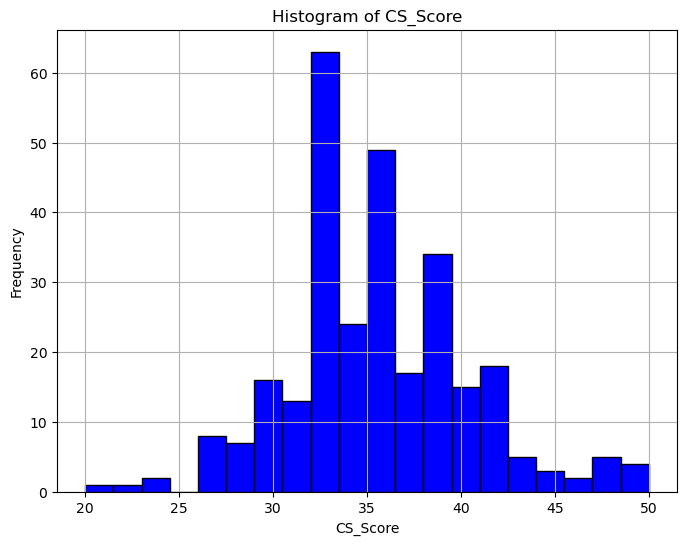

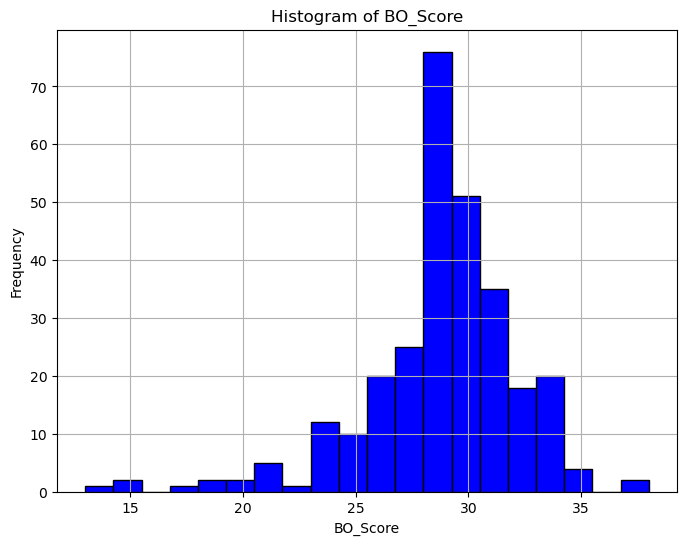

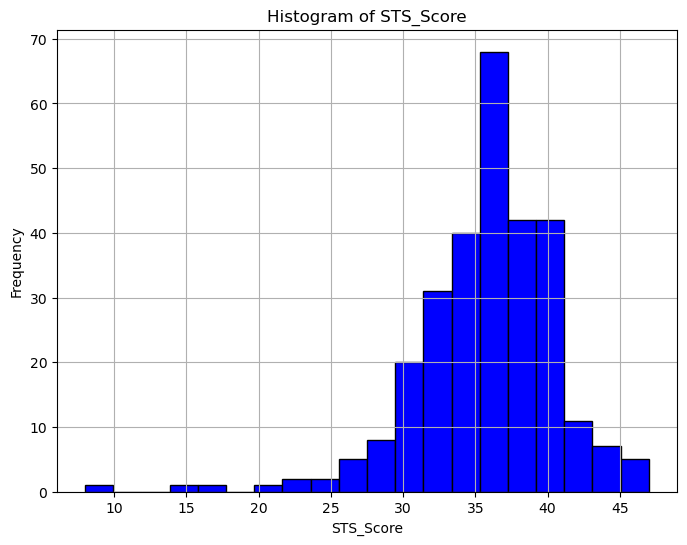

In [47]:
import matplotlib.pyplot as plt

# Assuming data_imputed is your DataFrame after MICE imputation
dependent_vars = ['CS_Score', 'BO_Score', 'STS_Score']

# Plot histograms for each dependent variable
for var in dependent_vars:
    plt.figure(figsize=(8, 6))
    data_imputed[var].hist(bins=20, color='blue', edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

## Boxplots for three response variables

Potential outliers:
CS_Score     15
BO_Score     10
STS_Score     8
dtype: int64


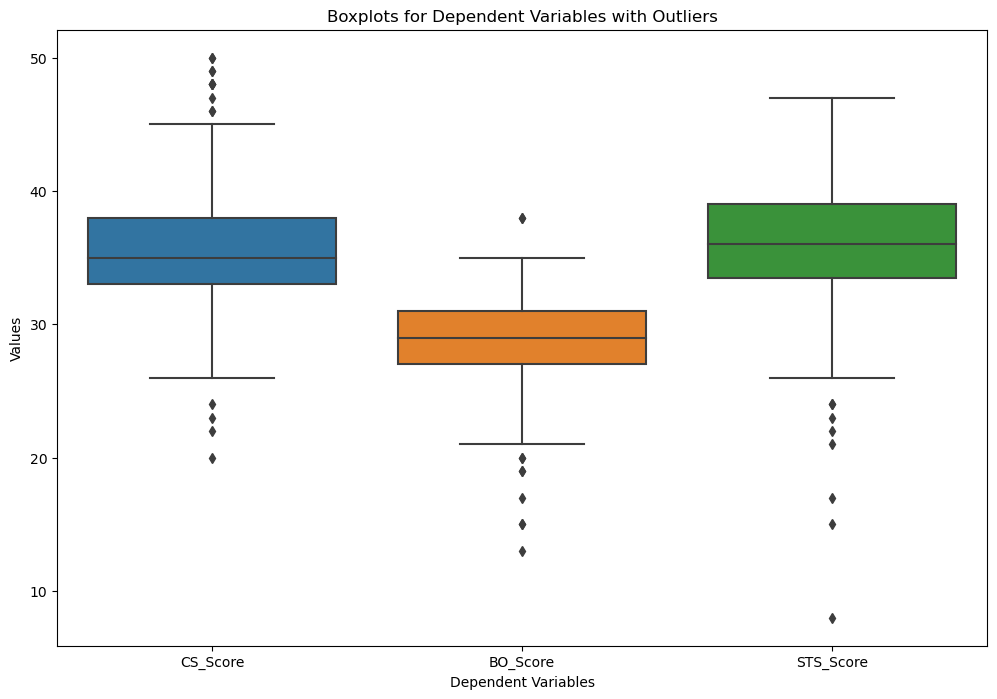

In [48]:
import seaborn as sns

# Assuming data_imputed is your DataFrame after MICE imputation
dependent_vars = ['CS_Score', 'BO_Score', 'STS_Score']

# Create a boxplot to visualize the distribution and potential outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_imputed[dependent_vars])
plt.title('Boxplots for Dependent Variables with Outliers')
plt.xlabel('Dependent Variables')
plt.ylabel('Values')

# Calculate IQR for each dependent variable
Q1 = data_imputed[dependent_vars].quantile(0.25)
Q3 = data_imputed[dependent_vars].quantile(0.75)
IQR = Q3 - Q1

# Identify potential outliers using the IQR method
outliers = ((data_imputed[dependent_vars] < (Q1 - 1.5 * IQR)) | (data_imputed[dependent_vars] > (Q3 + 1.5 * IQR)))

# Print the count of potential outliers for each variable
print("Potential outliers:")
print(outliers.sum())

plt.show()

## Shapiro Wilk's Test for normaility

In [49]:
from scipy.stats import shapiro

dependent_vars = ['CS_Score', 'BO_Score', 'STS_Score']

for var in dependent_vars:
    stat, p_value = shapiro(data_imputed[var])
    print(f'Shapiro-Wilk test for {var}:')
    print(f'Statistic: {stat}, p-value: {p_value}')

    alpha = 0.05
    if p_value > alpha:
        print(f'The {var} data appears to be normally distributed (fail to reject H0)')
    else:
        print(f'The {var} data does not appear to be normally distributed (reject H0)')
    print('\n')


Shapiro-Wilk test for CS_Score:
Statistic: 0.9768120646476746, p-value: 0.00013125732948537916
The CS_Score data does not appear to be normally distributed (reject H0)


Shapiro-Wilk test for BO_Score:
Statistic: 0.9199291467666626, p-value: 2.8284758216146066e-11
The BO_Score data does not appear to be normally distributed (reject H0)


Shapiro-Wilk test for STS_Score:
Statistic: 0.9249563813209534, p-value: 7.735769663730352e-11
The STS_Score data does not appear to be normally distributed (reject H0)




Shapiro-Wilk test for normality on CS_Score:
Statistic: 0.9856163859367371, p-value: 0.009628345258533955
Reject the null hypothesis: Data does not appear to be normally distributed.
Shapiro-Wilk test for normality on BO_Score:
Statistic: 0.9699136018753052, p-value: 2.4347993530682288e-05
Reject the null hypothesis: Data does not appear to be normally distributed.
Shapiro-Wilk test for normality on STS_Score:
Statistic: 0.989243745803833, p-value: 0.04818365350365639
Reject the null hypothesis: Data does not appear to be normally distributed.


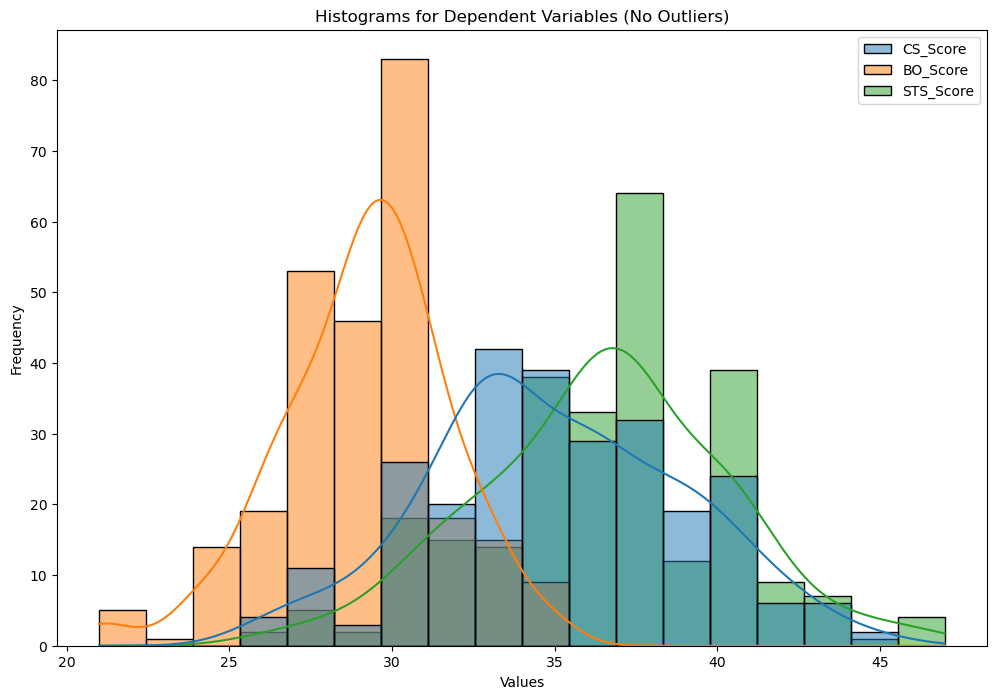

In [50]:
from scipy.stats import shapiro

# Remove potential outliers from data_imputed
data_no_outliers = data_imputed[~outliers.any(axis=1)]

# Perform Shapiro-Wilk test for normality on each dependent variable
for var in dependent_vars:
    stat, p_value = shapiro(data_no_outliers[var])
    print(f'Shapiro-Wilk test for normality on {var}:')
    print(f'Statistic: {stat}, p-value: {p_value}')
    
    # Check the null hypothesis
    if p_value > 0.05:
        print('Fail to reject the null hypothesis: Data appears to be normally distributed.')
    else:
        print('Reject the null hypothesis: Data does not appear to be normally distributed.')

# Optionally, you can also visualize the histograms after removing outliers
plt.figure(figsize=(12, 8))
sns.histplot(data_no_outliers[dependent_vars], kde=True)
plt.title('Histograms for Dependent Variables (No Outliers)')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
